In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
filepath = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
dataset = pd.read_csv(filepath)

In [16]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

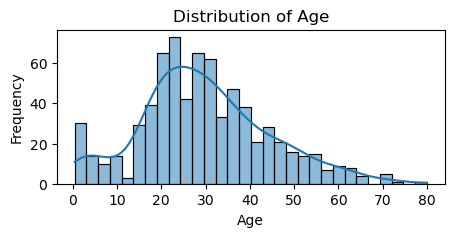

In [19]:
plt.figure(figsize=(5,2))
sns.histplot(dataset['Age'].dropna(),bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 

dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


Label_Encoder = LabelEncoder()
dataset['Sex'] = Label_Encoder.fit_transform(dataset['Sex'])
dataset['Sex'] = Label_Encoder.fit_transform(dataset['Sex'])

sc = StandardScaler()
dataset[['Age','Fare']] = sc.fit_transform(dataset[['Age','Fare']])

C:\Users\hebal\AppData\Local\Temp\ipykernel_7588\267373129.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
C:\Users\hebal\AppData\Local\Temp\ipykernel_7588\267373129.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [36]:
dataset.drop(['Ticket','Cabin'],axis=1, inplace=True)

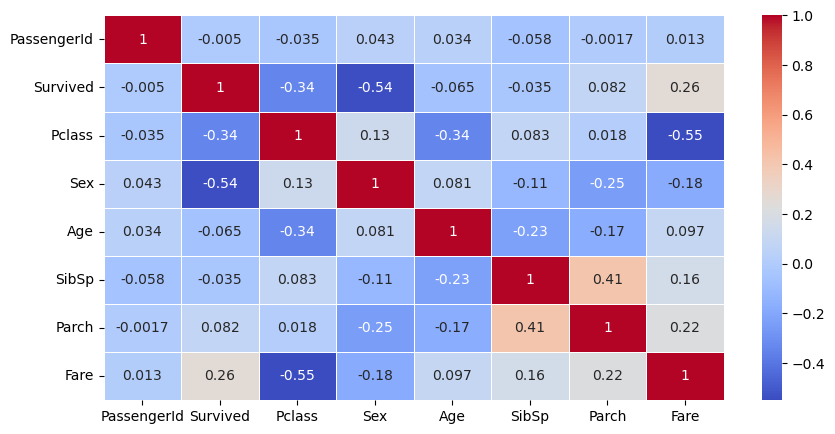

In [42]:
plt.figure(figsize=(10,5))
numerical_df = dataset.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = dataset[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y= dataset['Survived']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = round(100*accuracy_score(y_test, y_pred),2)
print(accuracy)
print(classification_report(y_test,y_pred))

81.01
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = round(100*accuracy_score(y_test, y_pred),2)
print(accuracy)
print(classification_report(y_test,y_pred))

79.89
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [79]:
df['bill_depth_mm'].fillna(df['bill_depth_mm'].median(), inplace=True)
df['bill_length_mm'].fillna(df['bill_length_mm'].median(), inplace=True)


C:\Users\hebal\AppData\Local\Temp\ipykernel_7588\2486410133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bill_depth_mm'].fillna(df['bill_depth_mm'].median(), inplace=True)
C:\Users\hebal\AppData\Local\Temp\ipykernel_7588\2486410133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [80]:
from sklearn.cluster import KMeans
X = df[['bill_length_mm','bill_depth_mm']]
kmeans = KMeans(n_clusters=3,random_state=42)

c:\Users\hebal\anaconda3\envs\mihir\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

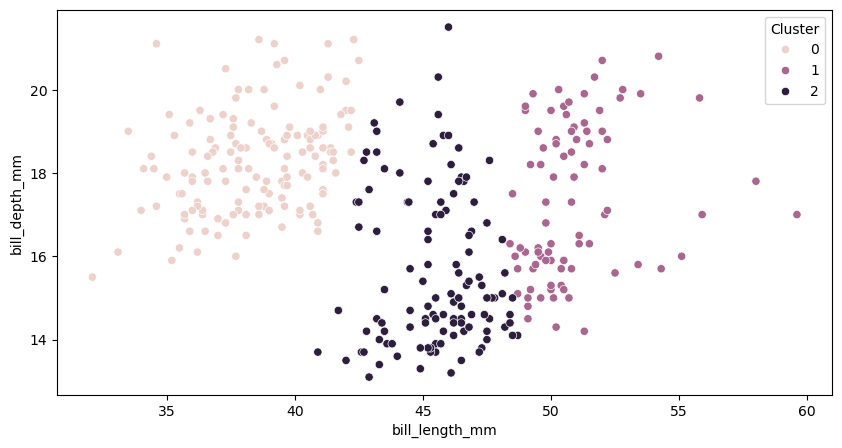

In [81]:
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10,5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',hue='Cluster',data=df)

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01,0.1,1,10]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)